In [55]:
import numpy as np
import pandas as pd
import requests
from io import StringIO
import yfinance as yf

from IPython.core.display import display
pd.set_option('display.max.rows', 3000)

import statsmodels
from statsmodels.tsa.stattools import coint
# just set the seed for the random number generator
np.random.seed(107)

import matplotlib.pyplot as plt

import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

In [56]:
np.__version__

'1.24.2'

In [112]:
import time
import datetime
import pandas as pd
from IPython.core.display import display
pd.set_option('display.max.rows', 3000)

#NQU23.CME
#NQZ23.CME

stock1 = 'QQQ'
stock2 = 'VXX'
#UNG #BBBY/ROST
tickers = [stock1, stock2]
interval = '1d'
#period1 = int(time.mktime(datetime.datetime(2023, 9, 6).timetuple()))
#period2 = int(time.mktime(datetime.datetime(2024, 9, 5).timetuple()))


In [113]:
tickers = [stock1, stock2]

# Download historical data for stock1 and stock2
for ticker in tickers:
    if ticker == stock1:
        df1 = yf.download(ticker, start="2020-09-16", end="2024-09-18", interval="1d")
    if ticker == stock2:
        df2 = yf.download(ticker, start="2020-09-16", end="2024-09-19", interval="1d")

# Handle NaN values
df1 = df1.fillna(0)
df2 = df2.fillna(0)

#print(df1.head())
#print(df2.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [114]:
score, pvalue, _ = coint(df1['Adj Close'],df2['Adj Close'])

In [115]:
print('Cointegration test p-value: ' + str(pvalue))

Cointegration test p-value: 0.9444109468683305


In [116]:
#df1 = df1.set_index('Date')
#df1.set_index(df1['Date'], inplace=True)
#df2.set_index(df2['Date'], inplace=True)

In [117]:
np.corrcoef(df1['Adj Close'],df2['Adj Close'])

array([[ 1.        , -0.54414302],
       [-0.54414302,  1.        ]])

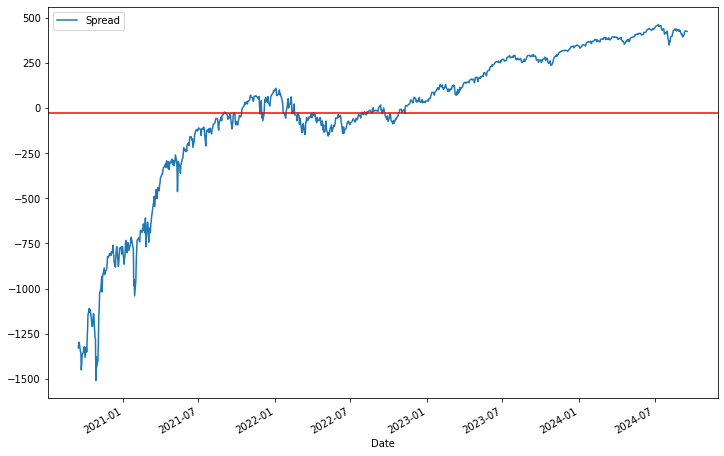

In [118]:
spread = df1['Adj Close'] - df2['Adj Close']
spread.plot(label='Spread',figsize=(12,8))
plt.axhline(spread.mean(),c='r')
plt.legend()

In [119]:
def zscore(stocks):
    return (stocks - stocks.mean()) / np.std(stocks)

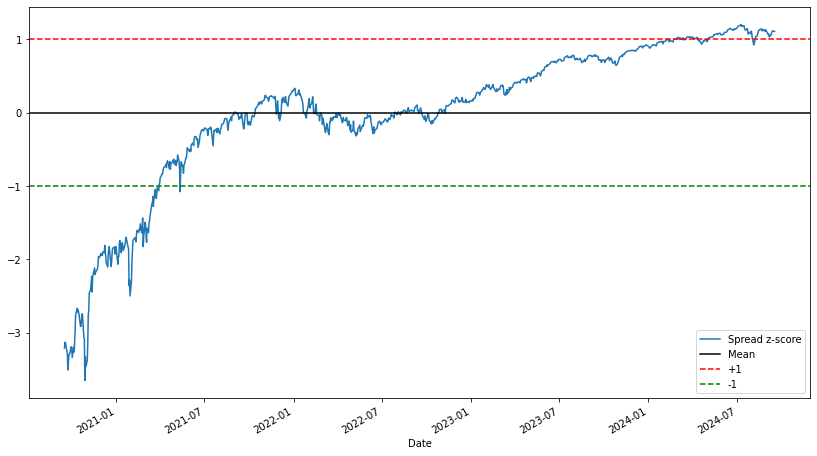

In [120]:
zscore(spread).plot(figsize=(14,8))
plt.axhline(zscore(spread).mean(), color='black')
plt.axhline(1.0, c='r', ls='--')
plt.axhline(-1.0, c='g', ls='--')
plt.legend(['Spread z-score', 'Mean', '+1', '-1']);

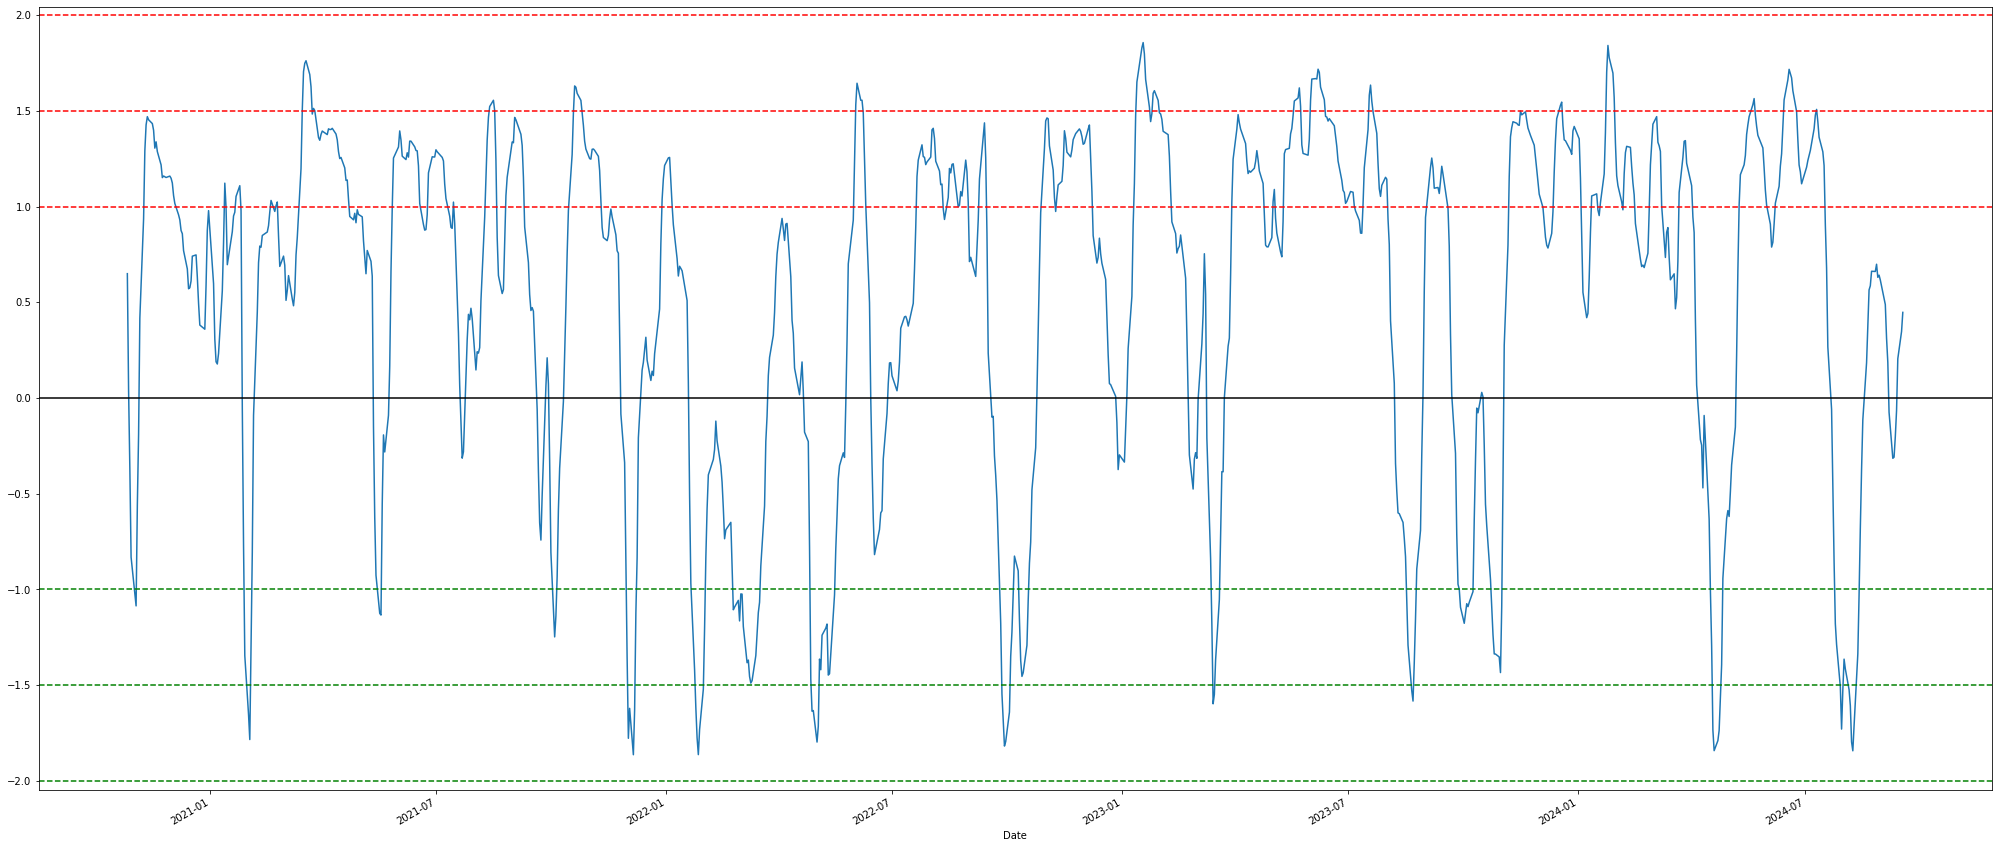

In [121]:
#1 day moving average of the price spread
spread_mavg1 = spread.rolling(5).mean()
spread_smooth_10 = spread.rolling(10).mean()

# 30 day moving average of the price spread
spread_mavg30 = spread.rolling(30).mean()

# Take a rolling 30 day standard deviation
std_30 = spread.rolling(30).std()

# Compute the z score for each day
zscore_30_1 = (spread_mavg1 - spread_mavg30)/std_30
smooth = (spread_smooth_10 - spread_mavg30)/std_30
          
zscore_30_1.plot(figsize=(35,16),label='Rolling 30 day Z score')
#smooth.plot()

plt.axhline(0, color='black');
plt.axhline(2.0, color='red', linestyle='--');
plt.axhline(1.5, color='red', linestyle='--');
plt.axhline(1.0, color='red', linestyle='--');
plt.axhline(-2.0, color='green', linestyle='--');
plt.axhline(-1.0, color='green', linestyle='--');
plt.axhline(-1.5, color='green', linestyle='--');

plt.show()

In [122]:
print (zscore_30_1[20:])

Date
2020-10-14         NaN
2020-10-15         NaN
2020-10-16         NaN
2020-10-19         NaN
2020-10-20         NaN
2020-10-21         NaN
2020-10-22         NaN
2020-10-23         NaN
2020-10-26         NaN
2020-10-27    0.649266
2020-10-28    0.036398
2020-10-29   -0.369527
2020-10-30   -0.831578
2020-11-02   -1.021764
2020-11-03   -1.085783
2020-11-04   -0.559862
2020-11-05   -0.188749
2020-11-06    0.417279
2020-11-09    0.935528
2020-11-10    1.290542
2020-11-11    1.426017
2020-11-12    1.469250
2020-11-13    1.453069
2020-11-16    1.433094
2020-11-17    1.398215
2020-11-18    1.304874
2020-11-19    1.337781
2020-11-20    1.287070
2020-11-23    1.217505
2020-11-24    1.150903
2020-11-25    1.159263
2020-11-27    1.151534
2020-11-30    1.158864
2020-12-01    1.147612
2020-12-02    1.122703
2020-12-03    1.057059
2020-12-04    1.015948
2020-12-07    0.956450
2020-12-08    0.930122
2020-12-09    0.874481
2020-12-10    0.858178
2020-12-11    0.769416
2020-12-14    0.674219
2020-1